In [2]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
%matplotlib inline

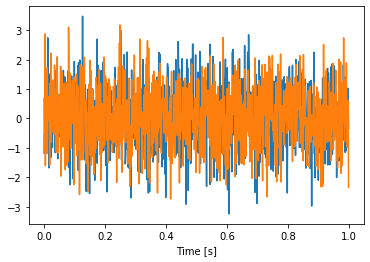

In [3]:

# Make two noise signals.

N = 1000;
dt= 0.001;
T = N*dt;
x = np.random.randn(N)
y = np.random.randn(N)
t = np.arange(0,N)*dt

plt.plot(t,x)
plt.plot(t,y)
plt.xlabel('Time [s]');

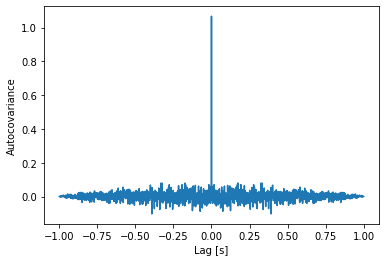

In [4]:

ac_xx = 1 / N * np.correlate(x,x, 'full')    # Compute the covariance.
lags = np.arange(-N + 1, N)                  # Create a lag axis,
plt.plot(lags * dt, ac_xx)                   # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Autocovariance');

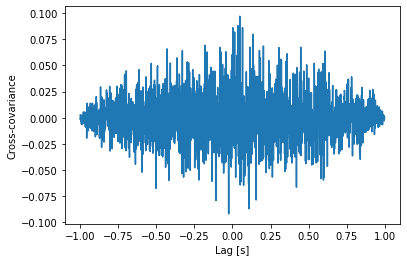

In [5]:
cc_xy = 1 / N * np.correlate(x,y, 'full')    # Compute the covariance.
lags = np.arange(-N + 1, N)                  # Create a lag axis,
plt.plot(lags * dt, cc_xy)                   # ... and plot the result.
plt.xlabel('Lag [s]')
plt.ylabel('Cross-covariance');

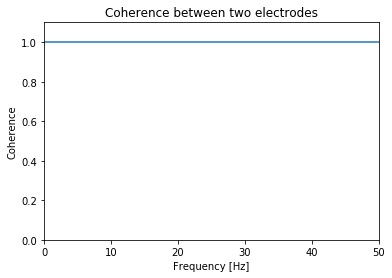

In [9]:
# Compute the coherence.

Xf = np.fft.fft(x - x.mean())           # Compute Fourier transform of x
Yf = np.fft.fft(y - y.mean())           # Compute Fourier transform of y

# Compute the spectra
Sxx = 2 * dt**2 / T * (Xf * Xf.conj())  # Spectrum of E1 trials
Syy = 2 * dt**2 / T * (Yf * Yf.conj())  # ... and E2 trials
Sxy = 2 * dt**2 / T * (Xf * Yf.conj())  # ... and the cross spectrum

# Compute the coherence.
cohr = abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

#f = fftfreq(N, dt)  # Define a frequency axis.
plt.plot(cohr.real[0:100])

plt.xlim([0, 50])  # ... in a chosen frequency range,
plt.ylim([0, 1.1])  # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')  # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes');


In [10]:
cohr.real


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.